# Exercices 4 - Speasy and Data Manipulation

<div align="center">
<img src="https://raw.githubusercontent.com/SciQLop/speasy/main/logo/logo_speasy.svg"/>
</div>

In [6]:
import speasy as spz
import matplotlib.pyplot as plt
%matplotlib widget

# Data manipulation

Speasy is a package essentially meant to ease data access.\
But it also provides basic features that are generally and quickly handy once data has arrived


## Fill values

In cases there is an instrument problem or data is missing, products often fill values with some obviously abnormal value such as 1e30.
Speasy provides a way to quickly transform fill values into NaNs, so they do not appear on plots or computations.<br/>


The following cell downloads data during an interval where there are fill values.\
Plotting the data makes it obvious fill values are a problem.


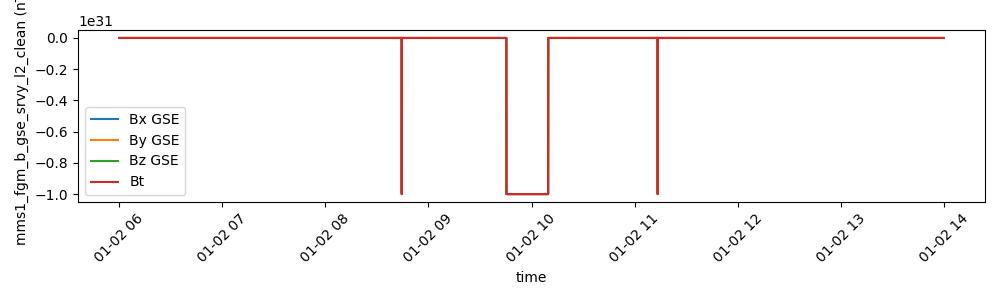

In [7]:
cda  = spz.inventories.data_tree.cda
start_date = "2019-01-02 06:00"
stop_date = "2019-01-02 14:00"

fig = plt.figure(figsize=(10,3))
mms1_fgm_b_gse_srvy = spz.get_data(cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2_clean, 
                                   start_date,
                                   stop_date)
mms1_fgm_b_gse_srvy.plot()
plt.tight_layout()
plt.show()

Now write code so to produce the next figure

In [8]:
#
#
#
# your code here 
# mms1_fgm_b_gse_srvy_noFillVal =  ....
#
#
#

In [9]:
# Answer : 
# --------
mms1_fgm_b_gse_srvy_noFillVal =  mms1_fgm_b_gse_srvy.replace_fillval_by_nan()

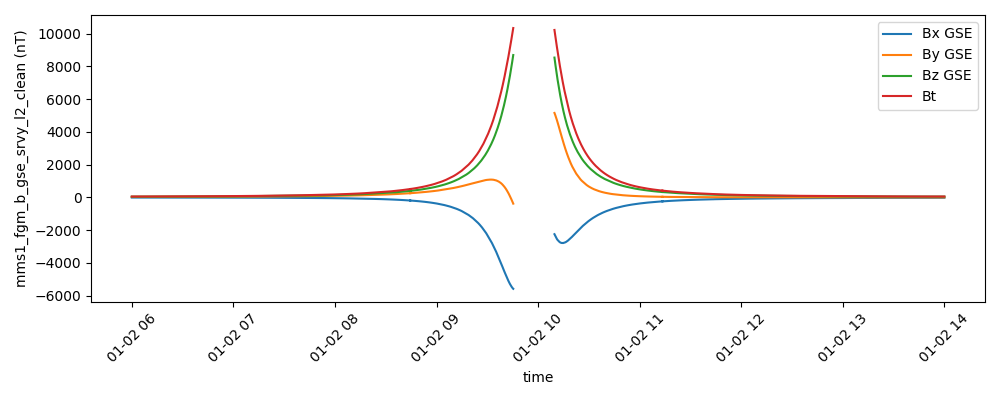

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
mms1_fgm_b_gse_srvy_noFillVal.plot()
plt.tight_layout()